# **PCA**







#Step 1 : import libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [ ]:

cancer = load_breast_cancer(as_frame=True)

df = cancer.frame

print('Original Dataframe shape :',df.shape)



Original Dataframe shape : (569, 31)


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (455, 30)
Test set shape: (114, 30)


#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)
print('Scaled training set shape:', X_train_scaled.shape)
print('Scaled test set shape:', X_test_scaled.shape)

Scaled training set shape: (455, 30)
Scaled test set shape: (114, 30)


#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('PCA-transformed training set shape:', X_train_pca.shape)
print('PCA-transformed test set shape:', X_test_pca.shape)

PCA-transformed training set shape: (455, 2)
PCA-transformed test set shape: (114, 2)


#Step 6: Fitting Logistic Regression To the training set




In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_pca, y_train)

from sklearn.metrics import accuracy_score


y_train_pred = model.predict(X_train_pca)


print('Training set accuracy:', accuracy_score(y_train, y_train_pred))

Training set accuracy: 0.9472527472527472


#Step 7: Predicting the test set result




In [ ]:
y_test_pred = model.predict(X_test_pca)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print('Test set accuracy:', accuracy)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print('Classification report:\n', report)

Test set accuracy: 0.9912280701754386
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



#Step 8: Making the confusion matrix




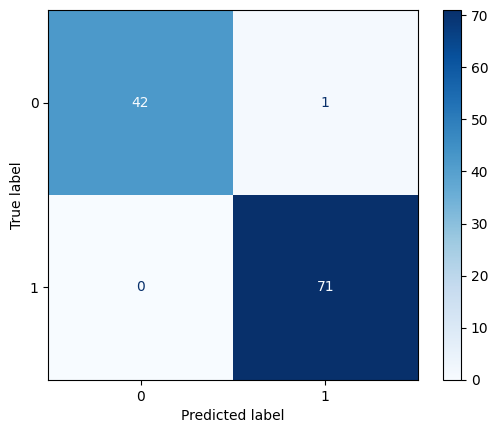

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
import matplotlib.pyplot as plt
plt.show()

#Step 9: Predicting the training set result




In [ ]:
y_train_pred = model.predict(X_train_pca)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_train_pred)
print('Training set accuracy:', accuracy)
from sklearn.metrics import classification_report

report = classification_report(y_train, y_train_pred)
print('Training set classification report:\n', report)

Training set accuracy: 0.9472527472527472
Training set classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       169
           1       0.95      0.97      0.96       286

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455



#Step 10: Visualizing the Test set results




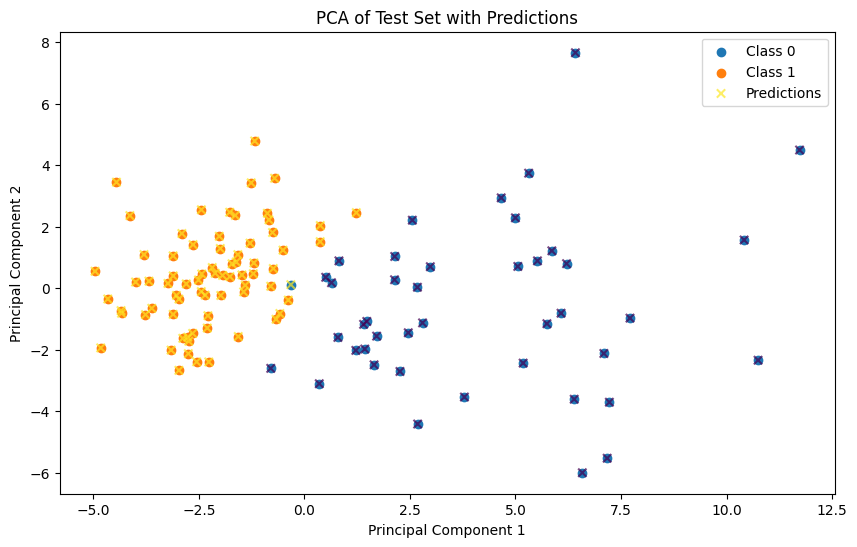

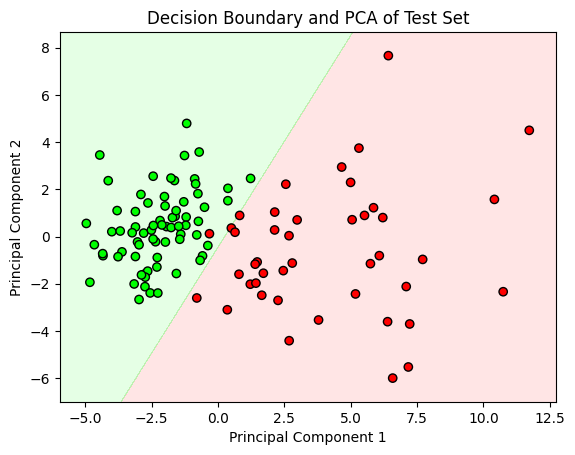

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))


classes = np.unique(y_test)
for class_label in classes:
    plt.scatter(
        X_test_pca[y_test == class_label, 0],
        X_test_pca[y_test == class_label, 1],
        label=f'Class {class_label}'
    )

plt.scatter(
    X_test_pca[:, 0],
    X_test_pca[:, 1],
    c=y_test_pred,
    marker='x',
    alpha=0.7,
    label='Predictions'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Test Set with Predictions')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary and PCA of Test Set')
plt.show()

#**Well Done :)**
Now let's practice!